In [1]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

In [2]:
dataset=pd.read_csv(r'C:\Users\LENOVO LAP\Desktop\train.csv')

In [3]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


C:\Users\LENOVO LAP\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\LENOVO LAP\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


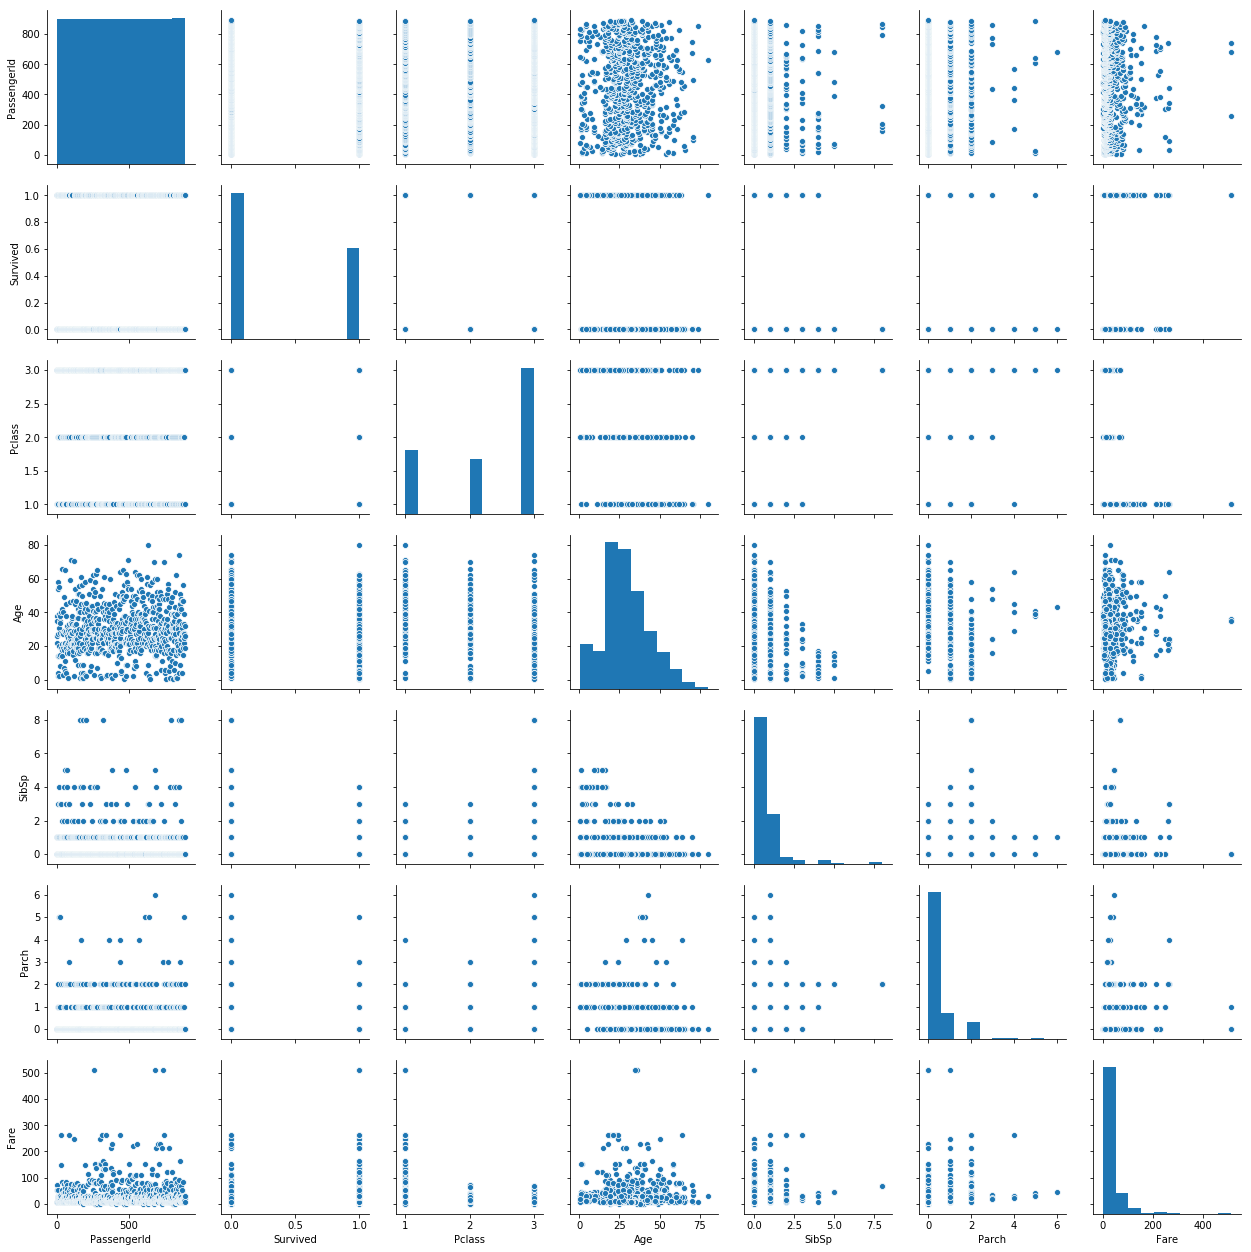

In [4]:
sns.pairplot(dataset)

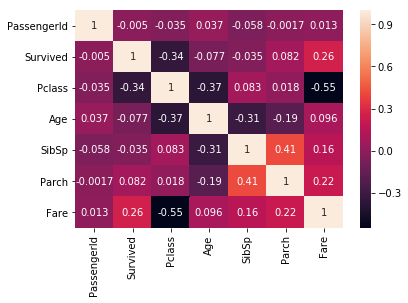

In [5]:
sns.heatmap(dataset.corr(),annot=True)

In [6]:
dataset=dataset.drop(columns=['PassengerId','Name','Ticket','Cabin'])

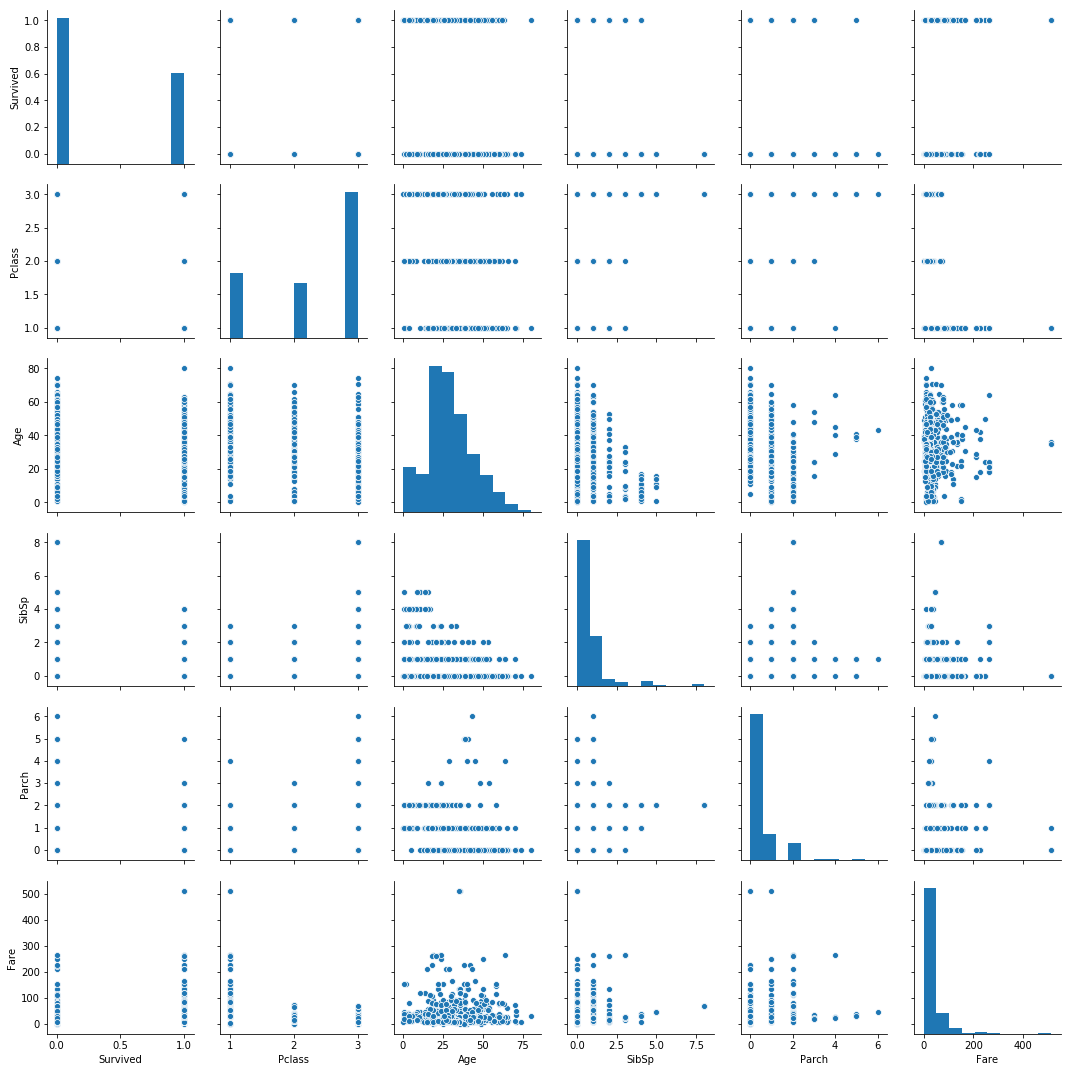

In [7]:
sns.pairplot(dataset)

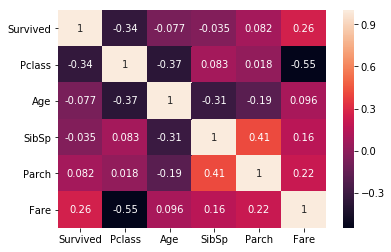

In [8]:
sns.heatmap(dataset.corr(),annot=True)

In [9]:
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [10]:
dataset.isnull().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

In [11]:
dataset.fillna(dataset.mean(),inplace=True)

In [12]:
dataset.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

In [13]:
dataset.dropna(inplace=True)

In [14]:
dataset.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [15]:
y=dataset.iloc[:,0].values

In [16]:
x=dataset.iloc[:,1:].values

In [17]:
x

array([[3, 'male', 22.0, ..., 0, 7.25, 'S'],
       [1, 'female', 38.0, ..., 0, 71.2833, 'C'],
       [3, 'female', 26.0, ..., 0, 7.925, 'S'],
       ...,
       [3, 'female', 29.69911764705882, ..., 2, 23.45, 'S'],
       [1, 'male', 26.0, ..., 0, 30.0, 'C'],
       [3, 'male', 32.0, ..., 0, 7.75, 'Q']], dtype=object)

In [18]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,

In [19]:
lc=LabelEncoder()

In [20]:
x[:,1]=lc.fit_transform(x[:,1])

In [21]:
x

array([[3, 1, 22.0, ..., 0, 7.25, 'S'],
       [1, 0, 38.0, ..., 0, 71.2833, 'C'],
       [3, 0, 26.0, ..., 0, 7.925, 'S'],
       ...,
       [3, 0, 29.69911764705882, ..., 2, 23.45, 'S'],
       [1, 1, 26.0, ..., 0, 30.0, 'C'],
       [3, 1, 32.0, ..., 0, 7.75, 'Q']], dtype=object)

In [22]:
x[:,-1]=lc.fit_transform(x[:,-1])

In [23]:
x

array([[3, 1, 22.0, ..., 0, 7.25, 2],
       [1, 0, 38.0, ..., 0, 71.2833, 0],
       [3, 0, 26.0, ..., 0, 7.925, 2],
       ...,
       [3, 0, 29.69911764705882, ..., 2, 23.45, 2],
       [1, 1, 26.0, ..., 0, 30.0, 0],
       [3, 1, 32.0, ..., 0, 7.75, 1]], dtype=object)

In [24]:
one=OneHotEncoder(categorical_features=[-1])

In [25]:
x=one.fit_transform(x).toarray()

C:\Users\LENOVO LAP\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO LAP\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [26]:
x

array([[ 0.    ,  0.    ,  1.    , ...,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  0.    ,  0.    , ...,  1.    ,  0.    , 71.2833],
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 0.    ,  0.    ,  1.    , ...,  1.    ,  2.    , 23.45  ],
       [ 1.    ,  0.    ,  0.    , ...,  0.    ,  0.    , 30.    ],
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  7.75  ]])

In [27]:
x=x[:,1:]

In [28]:
x

array([[ 0.    ,  1.    ,  3.    , ...,  1.    ,  0.    ,  7.25  ],
       [ 0.    ,  0.    ,  1.    , ...,  1.    ,  0.    , 71.2833],
       [ 0.    ,  1.    ,  3.    , ...,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 0.    ,  1.    ,  3.    , ...,  1.    ,  2.    , 23.45  ],
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  0.    , 30.    ],
       [ 1.    ,  0.    ,  3.    , ...,  0.    ,  0.    ,  7.75  ]])

In [29]:
#0,1 = S
#0,0 = C
#1,0 = Q

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [32]:
x_train

array([[ 1.    ,  0.    ,  3.    , ...,  1.    ,  0.    , 15.5   ],
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  0.    , 79.2   ],
       [ 0.    ,  1.    ,  3.    , ...,  1.    ,  0.    ,  7.0458],
       ...,
       [ 0.    ,  1.    ,  1.    , ...,  0.    ,  0.    , 30.    ],
       [ 1.    ,  0.    ,  3.    , ...,  0.    ,  0.    ,  7.75  ],
       [ 0.    ,  0.    ,  2.    , ...,  1.    ,  2.    , 41.5792]])

In [33]:
x_test

array([[  0.    ,   1.    ,   3.    , ...,   0.    ,   0.    ,   7.8542],
       [  0.    ,   1.    ,   3.    , ...,   8.    ,   2.    ,  69.55  ],
       [  0.    ,   1.    ,   1.    , ...,   1.    ,   2.    , 120.    ],
       ...,
       [  0.    ,   1.    ,   3.    , ...,   4.    ,   2.    ,  31.3875],
       [  0.    ,   0.    ,   1.    , ...,   0.    ,   0.    ,  30.5   ],
       [  0.    ,   1.    ,   3.    , ...,   0.    ,   0.    ,   7.75  ]])

In [34]:
y_train

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,

In [35]:
y_test

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1], dtype=int64)

# Decision Tree

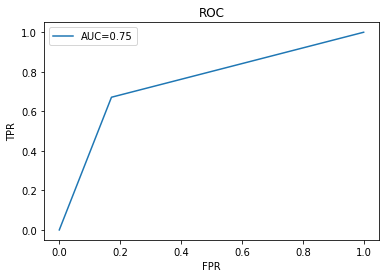

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
accuracy_score(y_test,y_pred)
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc=metrics.auc(fpr,tpr)
plt.plot(fpr,tpr,label='AUC=%0.2f' % roc)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend()

# Random Forest

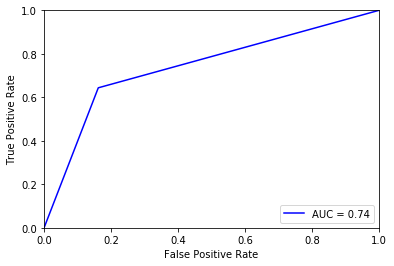

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10000,criterion='entropy')
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
sc=MinMaxScaler()

In [40]:
x_train=sc.fit_transform(x_train)

In [41]:
x_train

array([[1.        , 0.        , 1.        , ..., 0.125     , 0.        ,
        0.03025399],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.1545881 ],
       [0.        , 1.        , 1.        , ..., 0.125     , 0.        ,
        0.01375249],
       ...,
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.0585561 ],
       [1.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.01512699],
       [0.        , 0.        , 0.5       , ..., 0.125     , 0.33333333,
        0.08115719]])

In [42]:
x_test=sc.transform(x_test)
x_test

array([[0.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.01533038],
       [0.        , 1.        , 1.        , ..., 1.        , 0.33333333,
        0.13575256],
       [0.        , 1.        , 0.        , ..., 0.125     , 0.33333333,
        0.2342244 ],
       ...,
       [0.        , 1.        , 1.        , ..., 0.5       , 0.33333333,
        0.06126432],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.05953204],
       [0.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.01512699]])

# KNN 

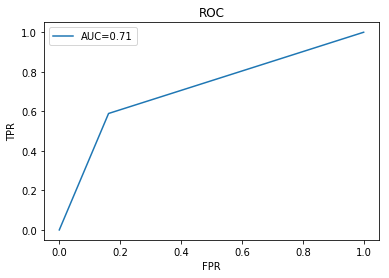

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,p=2)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
accuracy_score(y_test,y_pred)
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc=metrics.auc(fpr,tpr)
plt.plot(fpr,tpr,label='AUC=%0.2f' % roc)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend()

# LogisticRegression

In [44]:
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression()
logr.fit(x_train,y_train)
y_pred=logr.predict(x_test)
accuracy_score(y_test,y_pred)

C:\Users\LENOVO LAP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7191011235955056

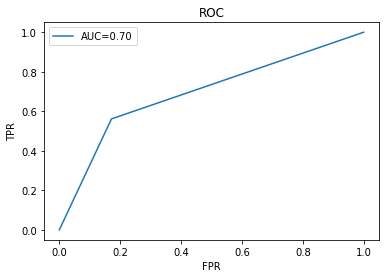

In [45]:
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc=metrics.auc(fpr,tpr)
plt.plot(fpr,tpr,label='AUC=%0.2f' % roc)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend()

# SVM Linear

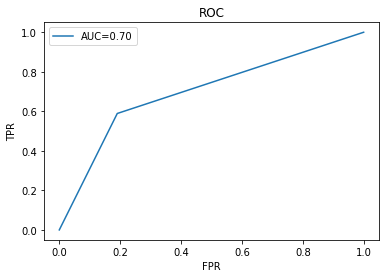

In [46]:
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc=metrics.auc(fpr,tpr)
plt.plot(fpr,tpr,label='AUC=%0.2f' % roc)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend()

# SVM RBF

C:\Users\LENOVO LAP\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


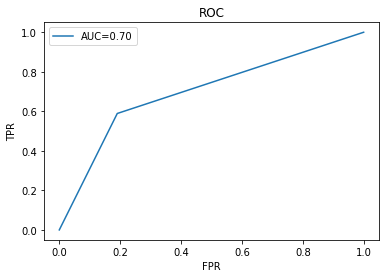

In [47]:
model=SVC(kernel='rbf')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc=metrics.auc(fpr,tpr)
plt.plot(fpr,tpr,label='AUC=%0.2f' % roc)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend()